# Importing Necessary Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Loading CSV data

In [6]:
csv_path = '../data/dataset.csv'
image_dir = '../data/images/'
data = pd.read_csv(csv_path)

# Preprocessing images

In [9]:
image_size = (48, 48)
images = []
labels = []

# Processing images based on folder structure

In [12]:
for index, row in data.iterrows():
    person_folder = os.path.join(image_dir, str(row['set_id']))
    if not os.path.exists(person_folder):
        print(f"Missing folder: {person_folder}")
        continue

    for img_file in os.listdir(person_folder):
        img_path = os.path.join(person_folder, img_file)
        if not img_file.endswith(('.jpg', '.png')):
            print(f"Skipping non-image file: {img_path}")
            continue
        
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, image_size)
            img = img / 255.0
            images.append(img)
            labels.append(img_file.split('.')[0])  # Extract emotion from filename
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

images = np.array(images)
labels = np.array(labels)

# Encoding labels

In [14]:
encoder = LabelBinarizer()
labels_encoded = encoder.fit_transform(labels)

# Train-test split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    images, labels_encoded, test_size=0.2, random_state=42
)

# Visualization

In [18]:
# Print information about the dataset
EMOTIONS = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']
print("Number of images:", len(images))
print("Shape of images array:", images.shape)
print("Number of labels:", len(labels))


Number of images: 152
Shape of images array: (152, 48, 48, 3)
Number of labels: 152


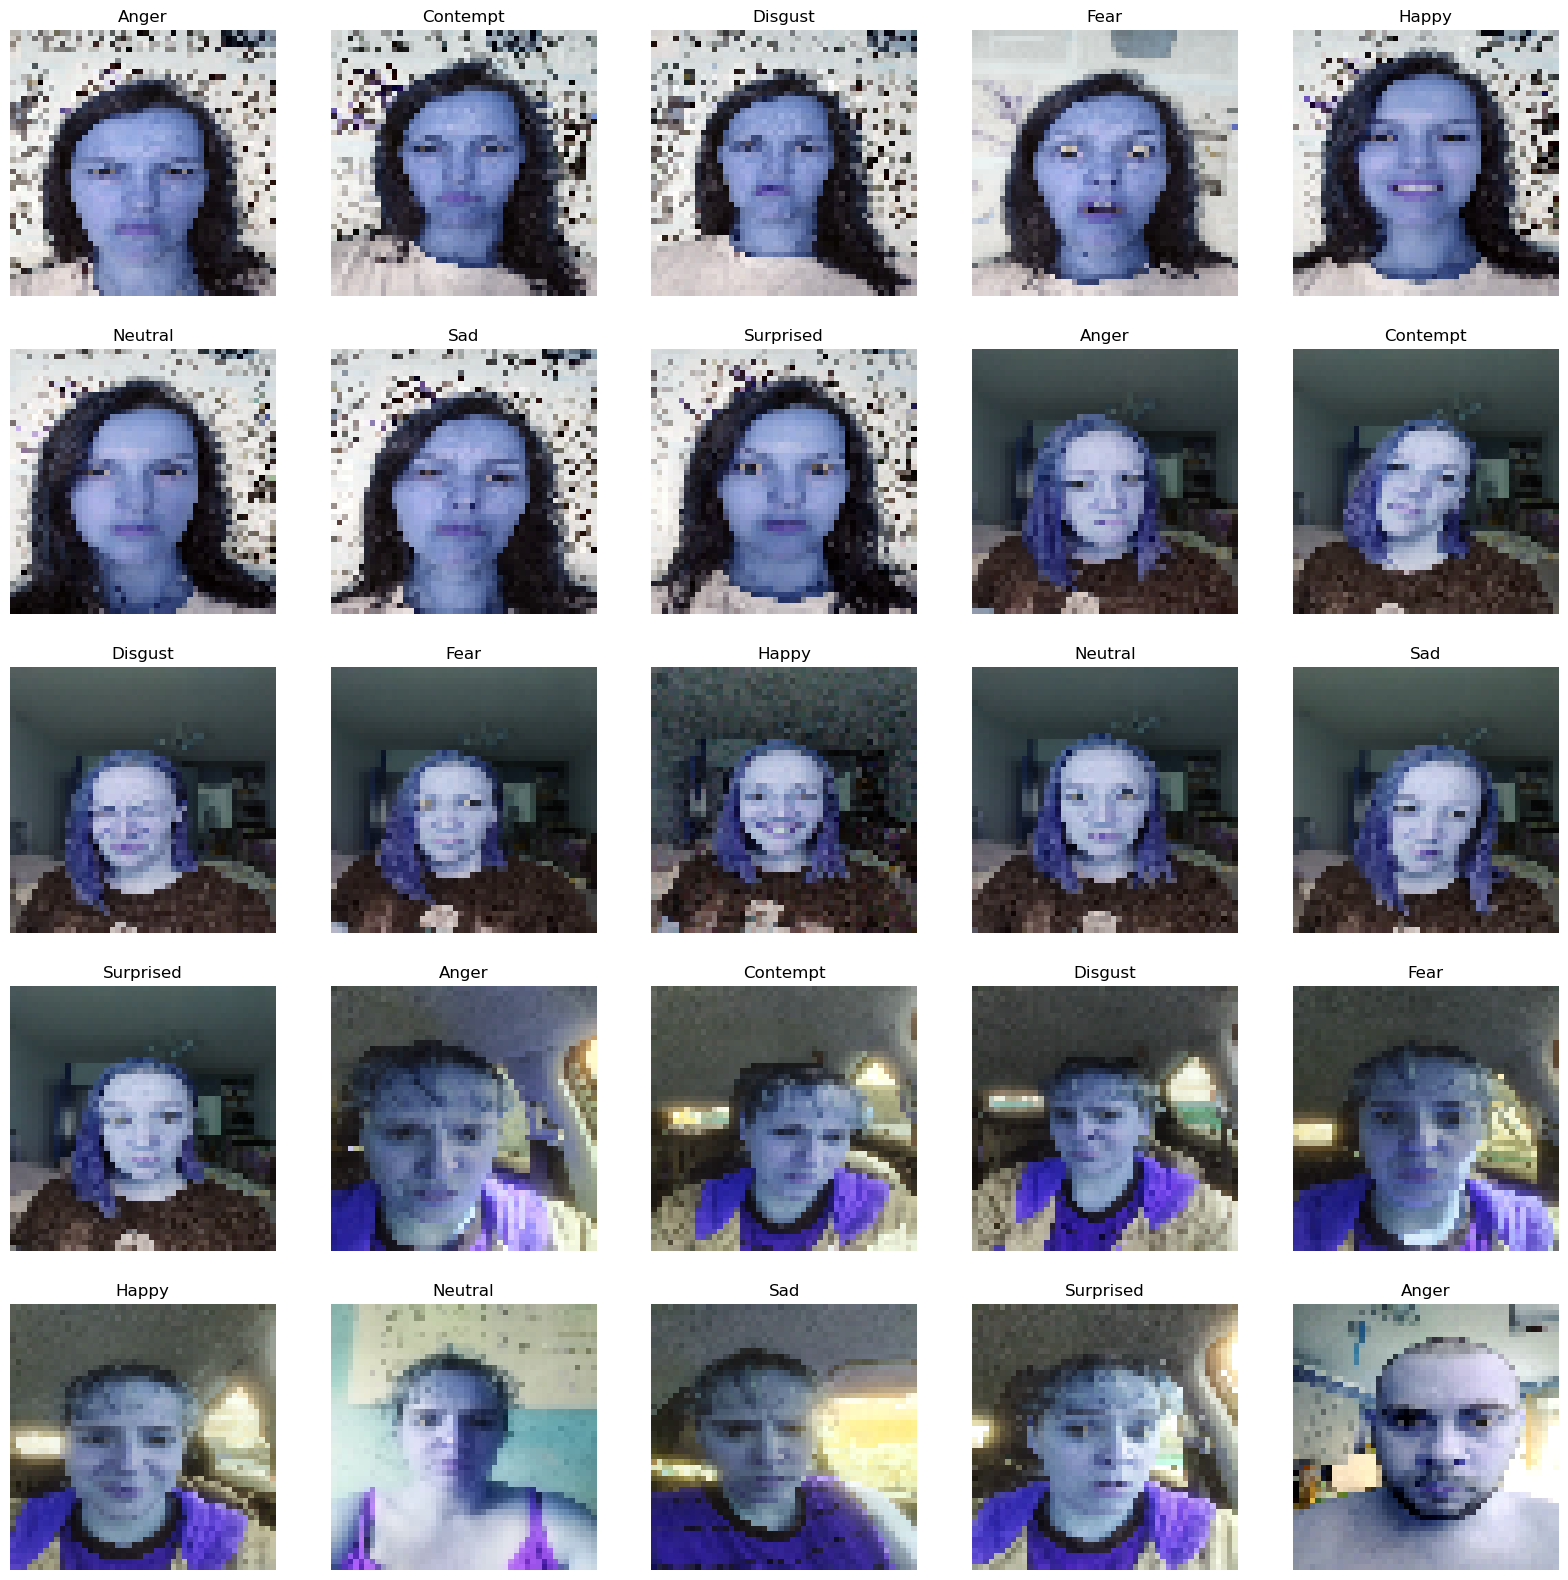

In [20]:
# Print sample images and their corresponding labels
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(labels[i])
    plt.axis('off')
plt.show()

# CNN Model

In [22]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(encoder.classes_), activation='softmax')
])

C:\Users\hello\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile and train

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.0938 - loss: 2.2717 - val_accuracy: 0.0400 - val_loss: 2.2026
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.1224 - loss: 2.1405 - val_accuracy: 0.1600 - val_loss: 2.0988
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.1146 - loss: 2.0828 - val_accuracy: 0.0800 - val_loss: 2.0897
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1745 - loss: 2.0669 - val_accuracy: 0.0800 - val_loss: 2.0934
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.2331 - loss: 2.0600 - val_accuracy: 0.0800 - val_loss: 2.1022
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2773 - loss: 2.0363 - val_accuracy: 0.0000e+00 - val_loss: 2.1286
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2617 - loss: 2.0246 - val_accuracy: 0.0400 - val_loss: 2.1529
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.1966 - loss: 2.0112 - val_accuracy: 0.0400 - val_

# Save model

In [26]:
model.save('../saved_models/emotion_recognition_model.h5')

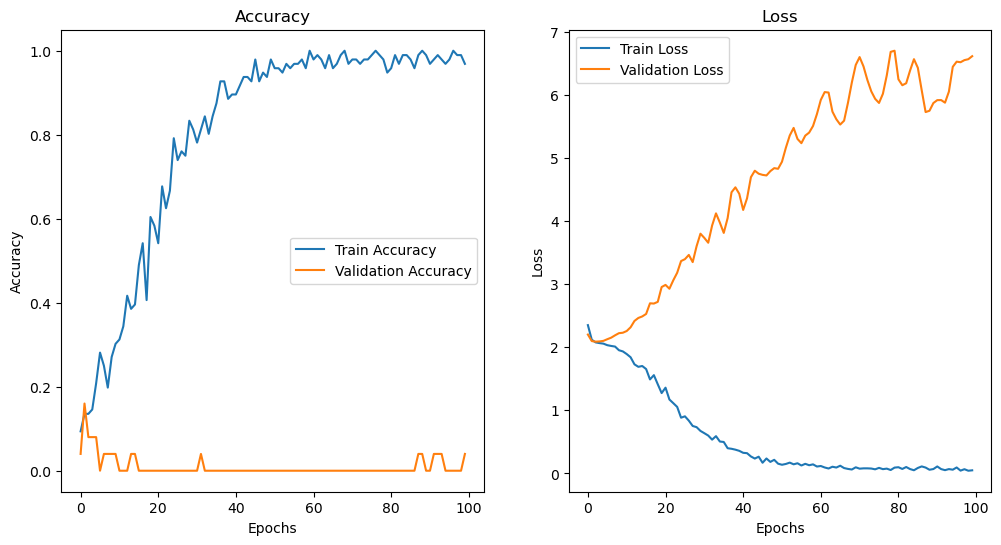

In [28]:

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()